# Web scraping using Selenium with Python (navigating javascript pages & link)

## Web Scraping
Web Scraping is a tool for turning the unstructured data on the web into machine readable, structured data which is ready for analysis.
Using the Python programming language, it is possible to “scrape” data from the web in a quick and efficient manner.

### Complex task with JavaScript links
These days almost all websites use JavaScript links for navigation and to load dynamic stuff. Scraping data from Javascript links make web scraping a bit tricky because the links are dynamic and not static. If you 'Inspect Element' for the link from any Browser it may look something like this:
```
href="javascript:__doPostBack('ctl00$bodyContent$gvIndividuals$ctl02$lbtnIndDetail','')"
```
These links cannot be used directly by your script and read HTML. One way to solve this is to automate the web browser process with Python.

###  <a href='https://pypi.python.org/pypi/selenium'> Selenium</a> can be a life saver
The Selenium package is used to automate web browser interaction from Python. With Selenium, programming a Python script to automate a web browser is possible. Afterwards, those pesky JavaScript links are no longer an issue. Selenium can start a web browser and perform further steps. I have used Firefox.

### Expectations from our web scraper before starting to code
As an example we are going to scrape this <a href="https://www.securities-administrators.ca/nrs/nrsIndvSearchResults.aspx?mode=AS&type=I&indv=&firm=&juri=ON&ctgy=1&history=0"> Website </a>

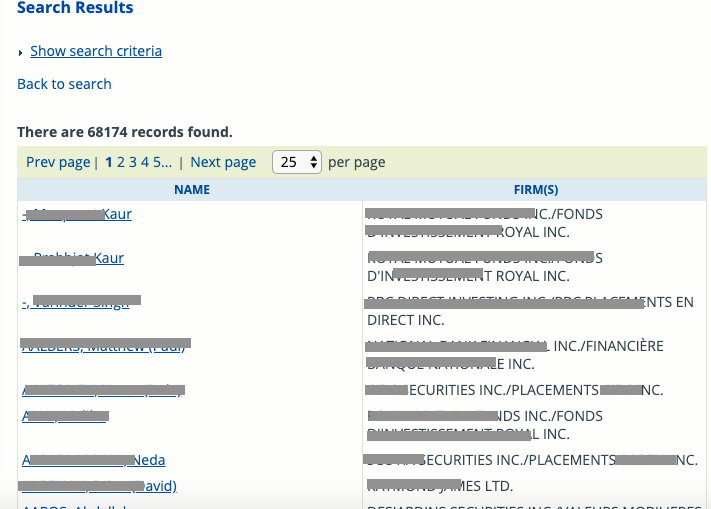

In [108]:

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

from bs4 import BeautifulSoup
import re
import pandas as pd
import os
import time


In [109]:
# create a new Firefox session
driver = webdriver.Firefox()
driver.implicitly_wait(30)


In [110]:
# Initialize 

base_url='https://www.securities-administrators.ca/nrs/nrsIndvSearchResults.aspx?mode=AS&type=I&indv=&firm=&juri=1&ctgy=1&history=0'

#  full path of folder. Multiple csv will be created. Better to give path of empty folder
__filePath = '/Users/anjalisingh/Documents/Python Workspace/webScrap_CSA/'
__fileName = 'scrap'
__extension = '.csv'
pageCounter = 0
fileCounter = 0


In [105]:
driver.get(base_url)
time.sleep(2)
# making 100 rows on page to reduce clicks
driver.find_element_by_xpath("//select[@name='ctl00$bodyContent$list_num_per_page']/option[text()='100']").click()


In [107]:
while True:
    count=0  
    df = pd.DataFrame(columns=['Name','Firm','Address'])

    #Create a new file after scraping some pages...
    if pageCounter == 3 or pageCounter==0:
        fileCounter= fileCounter + 1
        saveAs= __filePath+__fileName+str(fileCounter)+__extension
        pageCounter=0
        # DF
        #Initialize a dataframe to store each page records. Then write it to file. Repeat this for each page.
        df.to_csv(saveAs, index=False, mode='w')

    time.sleep(2)
    links = [link.get_attribute('href') for link in driver.find_elements_by_xpath("//table[@class='gridview_style']/tbody/tr/td/a")]
    
    #Loop to get all records from current page
    for link in links:
        count = count+1
        if count == 2:
            break
            
        # Entering into the page
        driver.get(link)
        # wait for browser to load page
        time.sleep(2)
        
        myElem = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'ctl00_bodyContent_divIndividualDetailsAccordion')))
        
        name = driver.find_elements_by_id('ctl00_bodyContent_lblIndvName')[0].text
        firm = driver.find_elements_by_xpath("//div[@class='current-content']/table/tbody/tr[1]/td[2]")[0].text
        addr = driver.find_elements_by_xpath("//div[@class='current-content']/table/tbody/tr[2]/td[2]")[0].text
        
        # append the record to data frame
        d = {'Name':name,'Firm':firm,'Address':addr}
        df = df.append(d, ignore_index=True)
     #Writing the records of page in local file
    df.to_csv(saveAs, index=False, mode='a',header=False)
    
    # Completed scraping current page and increasing page counter
    pageCounter= pageCounter + 1

   
    # Going back to search results
    driver.find_elements_by_xpath("//a[@id='A1']")[0].click() 
    time.sleep(2)
    
    #Clicking Next and navigating pages
    try:
        nextlink = driver.find_element_by_xpath('//*[@id="ctl00_bodyContent_lbtnNext"]').get_attribute('href')
        driver.get(nextlink)
        time.sleep(2)
    #stopping when there is no next page
    except NoSuchElementException:
        break

KeyboardInterrupt: 